# Decision Tree and Random Forest Analysis
## Custom Dataset Exploration and Machine Learning

This notebook demonstrates:
1. **Custom Dataset Creation** - Employee Performance Dataset
2. **Exploratory Data Analysis (EDA)** - Understanding the data patterns
3. **Decision Tree Implementation** - Single tree model
4. **Random Forest Implementation** - Ensemble method
5. **Model Comparison and Results** - Performance metrics and insights

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler



In [2]:
df= pd.read_csv('employee_performance_dataset.csv')

In [3]:
df.head()

,employee_id,age,years_experience,department,education_level,performance_score,salary,hours_worked_per_week,previous_promotions,training_hours,certifications,team_size,remote_work_days,promoted
0,1,38,0.9,Engineering,Bachelor,25.9,62384,44.4,0,49.8,0,1,1,0
1,2,33,0.6,Engineering,High School,21.7,79808,39.5,1,12.6,2,3,0,1
2,3,40,5.1,Engineering,Bachelor,63.4,107060,37.0,0,6.4,2,8,1,1
3,4,47,6.1,Sales,Master,30.2,113914,37.5,0,3.1,2,3,0,0
4,5,33,0.2,Finance,Bachelor,35.3,96444,42.8,1,0.1,4,5,4,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            1000 non-null   int64  
 1   age                    1000 non-null   int64  
 2   years_experience       1000 non-null   float64
 3   department             1000 non-null   object 
 4   education_level        1000 non-null   object 
 5   performance_score      1000 non-null   float64
 6   salary                 1000 non-null   int64  
 7   hours_worked_per_week  1000 non-null   float64
 8   previous_promotions    1000 non-null   int64  
 9   training_hours         1000 non-null   float64
 10  certifications         1000 non-null   int64  
 11  team_size              1000 non-null   int64  
 12  remote_work_days       1000 non-null   int64  
 13  promoted               1000 non-null   int64  
dtypes: float64(4), int64(8), object(2)
memory usage: 109.5+ K

In [5]:
df.describe()

,employee_id,age,years_experience,performance_score,salary,hours_worked_per_week,previous_promotions,training_hours,certifications,team_size,remote_work_days,promoted
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,34.799000,4.056100,29.347300,93037.164000,42.100700,0.806000,19.647500,1.253000,5.752000,2.249000,0.167000
std,288.819436,7.560143,3.718552,16.455715,17469.611188,6.105865,0.881556,18.929465,1.155996,3.955774,1.617905,0.373162
min,1.000000,22.000000,0.000000,0.500000,45510.000000,30.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,250.750000,29.000000,1.000000,16.500000,81073.750000,37.800000,0.000000,5.700000,0.000000,3.000000,1.000000,0.000000
50%,500.500000,35.000000,3.100000,27.600000,91698.500000,42.000000,1.000000,13.400000,1.000000,5.000000,2.000000,0.000000
75%,750.250000,40.000000,6.000000,40.925000,103251.750000,46.300000,1.000000,28.025000,2.000000,8.000000,4.000000,0.000000
max,1000.000000,65.000000,19.300000,81.300000,151277.000000,60.000000,5.000000,80.000000,6.000000,15.000000,5.000000,1.000000


In [6]:
df.shape

(1000, 14)

In [7]:
df.isnull().sum()

employee_id              0
age                      0
years_experience         0
department               0
education_level          0
performance_score        0
salary                   0
hours_worked_per_week    0
previous_promotions      0
training_hours           0
certifications           0
team_size                0
remote_work_days         0
promoted                 0
dtype: int64

In [8]:
df['promoted'].value_counts(normalize=True)

promoted
0    0.833
1    0.167
Name: proportion, dtype: float64

In [9]:
df.select_dtypes(include=['int64', 'float64']).columns

Index(['employee_id', 'age', 'years_experience', 'performance_score', 'salary',
       'hours_worked_per_week', 'previous_promotions', 'training_hours',
       'certifications', 'team_size', 'remote_work_days', 'promoted'],
      dtype='object')

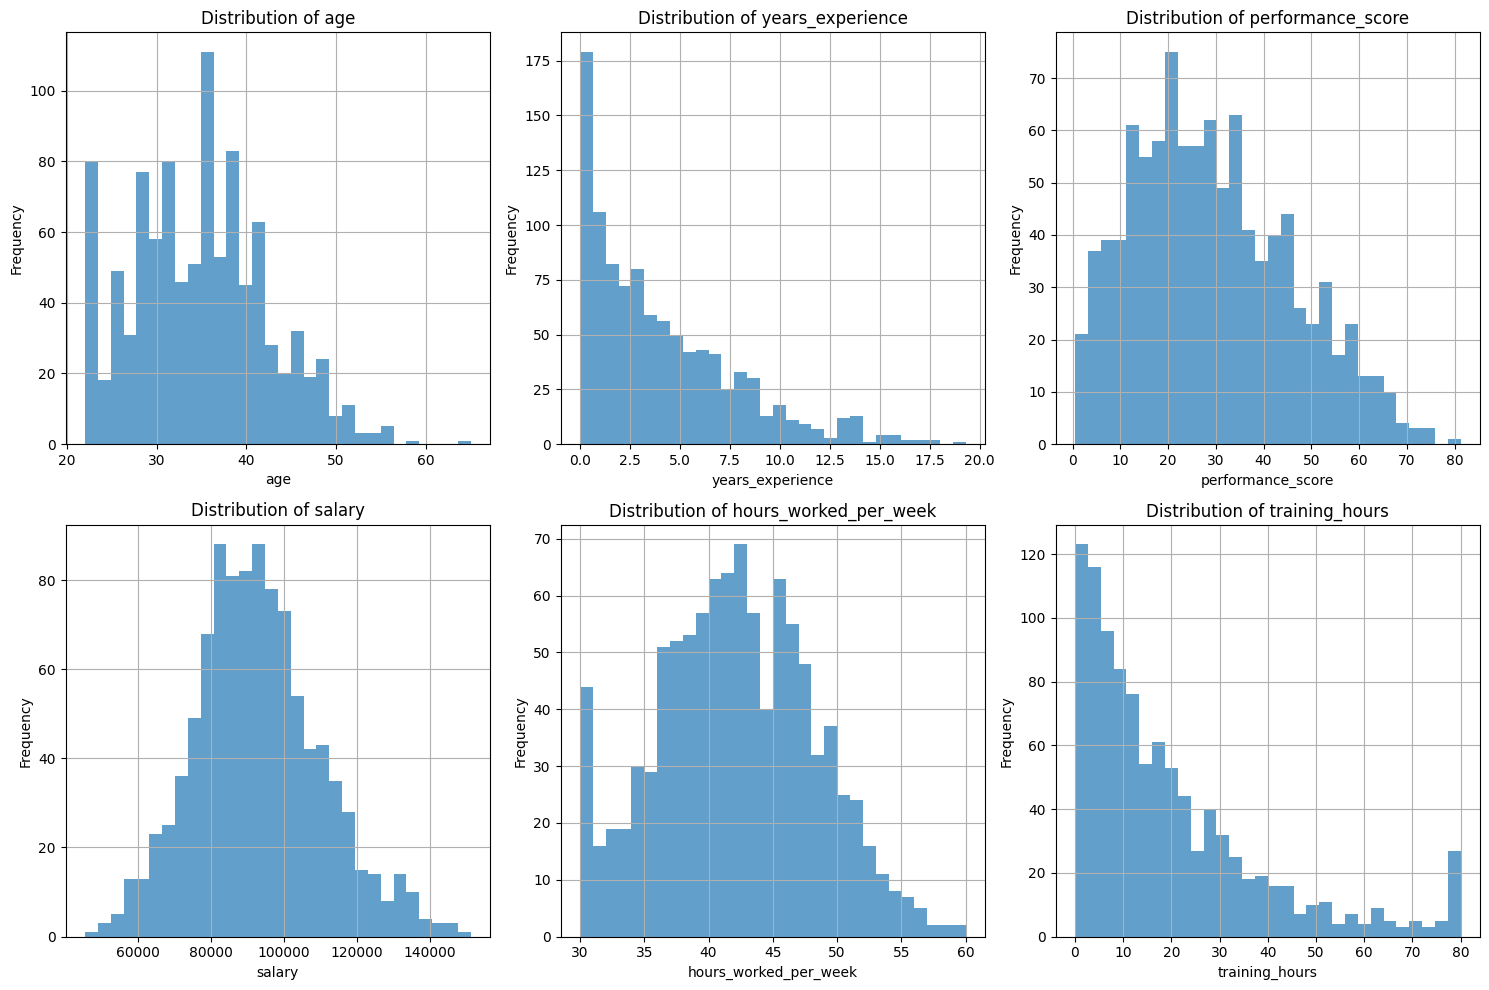

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
numerical_cols = ['age', 'years_experience', 'performance_score', 'salary', 'hours_worked_per_week', 'training_hours']

for i, col in enumerate(numerical_cols):
    df[col].hist(ax=axes[i//3, i%3], bins=30, alpha=0.7)
    axes[i//3, i%3].set_title(f'Distribution of {col}')
    axes[i//3, i%3].set_xlabel(col)
    axes[i//3, i%3].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

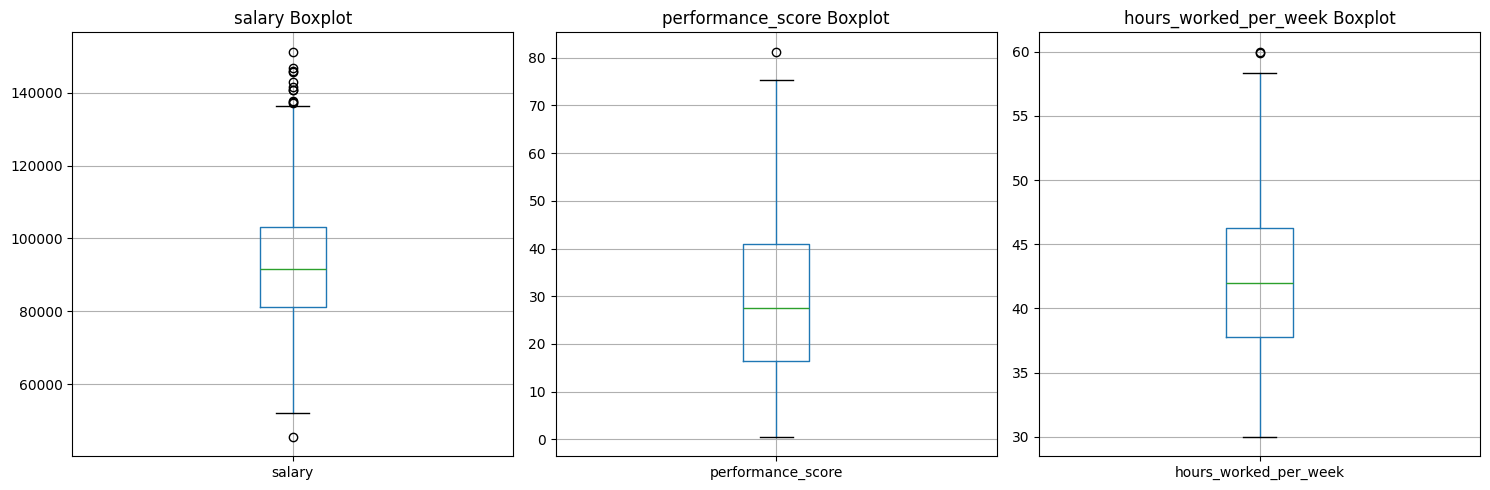

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
columns = ['salary', 'performance_score', 'hours_worked_per_week']

for ax, col in zip(axes, columns):
    df.boxplot(column=col, ax=ax)
    ax.set_title(f'{col} Boxplot')

plt.tight_layout()
plt.show()

In [12]:
df.select_dtypes(include=[object]).columns

Index(['department', 'education_level'], dtype='object')

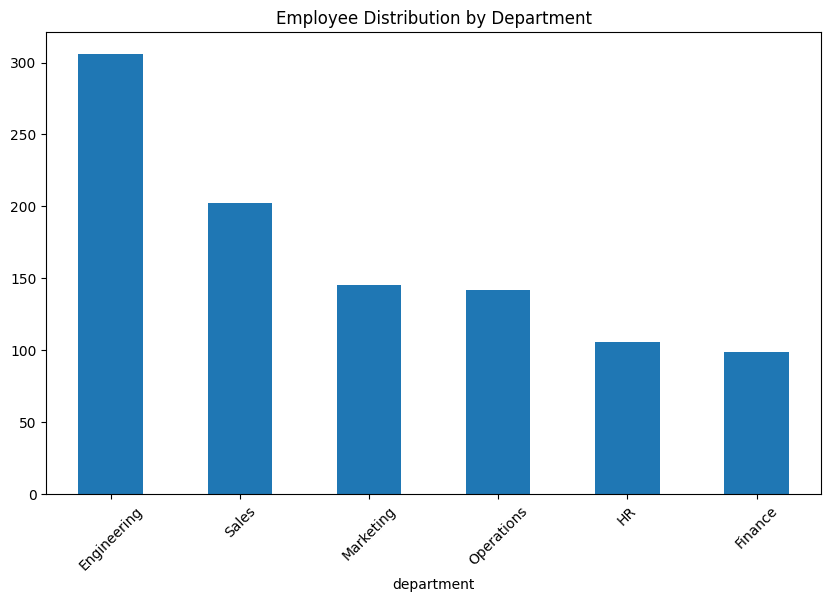

In [13]:
plt.figure(figsize=(10,6))
df['department'].value_counts().plot(kind='bar')
plt.title('Employee Distribution by Department')
plt.xticks(rotation=45)
plt.show()

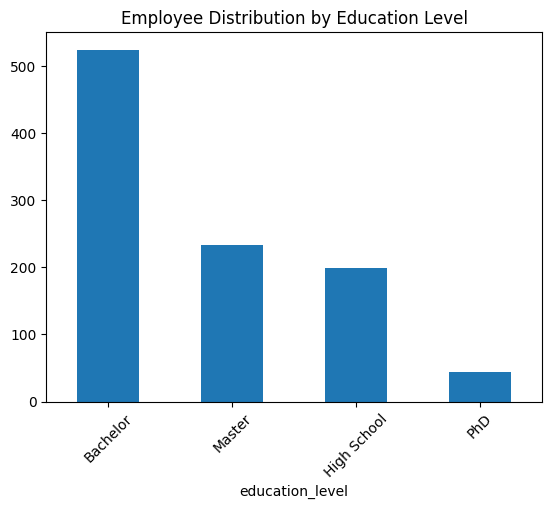

In [14]:

df['education_level'].value_counts().plot(kind='bar')
plt.title('Employee Distribution by Education Level')
plt.xticks(rotation=45)
plt.show()

In [15]:
# Promotion rate by department
dept_promotion = df.groupby('department')['promoted'].agg(['count', 'sum', 'mean'])
dept_promotion.columns = ['total_employees', 'promoted_count', 'promotion_rate']
print("Promotion Rate by Department:")
print(dept_promotion.sort_values('promotion_rate', ascending=False))

Promotion Rate by Department:
             total_employees  promoted_count  promotion_rate
department                                                  
Engineering              306              65        0.212418
Finance                   99              18        0.181818
Marketing                145              24        0.165517
Operations               142              22        0.154930
Sales                    202              25        0.123762
HR                       106              13        0.122642


In [16]:
# Promotion rate by education level
edu_promotion = df.groupby('education_level')['promoted'].agg(['count', 'sum', 'mean'])
edu_promotion.columns = ['total_employees', 'promoted_count', 'promotion_rate']
print("Promotion Rate by Education Level:")
print(edu_promotion.sort_values('promotion_rate', ascending=False))

Promotion Rate by Education Level:
                 total_employees  promoted_count  promotion_rate
education_level                                                 
Master                       233              46        0.197425
PhD                           44               8        0.181818
Bachelor                     524              85        0.162214
High School                  199              28        0.140704


<Figure size 1000x600 with 0 Axes>

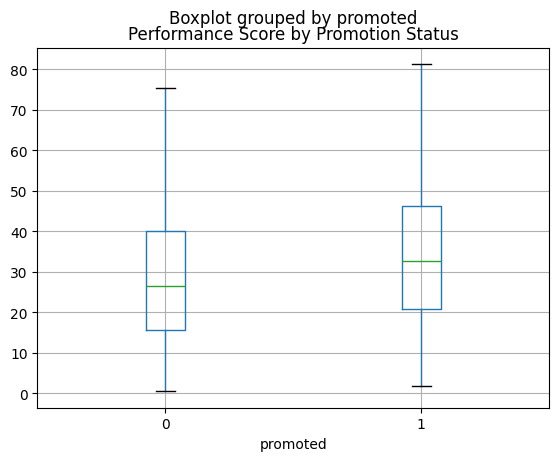

In [17]:
# Performance score by promotion status
plt.figure(figsize=(10, 6))
df.boxplot(column='performance_score', by='promoted')
plt.title('Performance Score by Promotion Status')
plt.show()

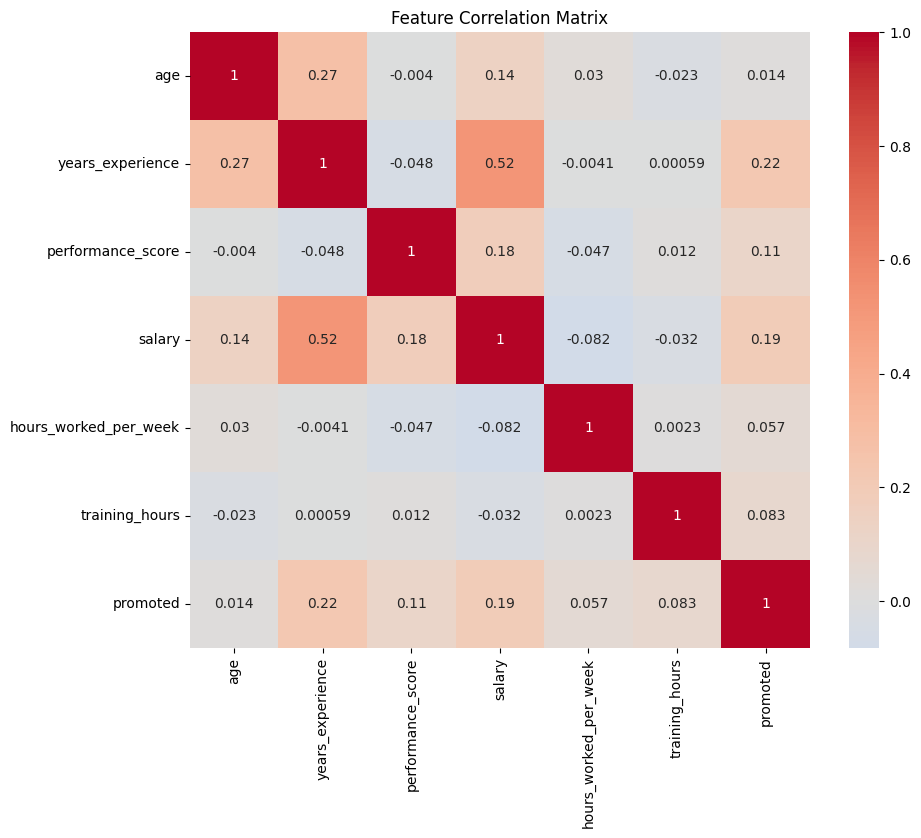

In [18]:
# Correlation matrix for numerical features
numerical_features = ['age', 'years_experience', 'performance_score', 'salary', 'hours_worked_per_week', 'training_hours', 'promoted']
correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

<Figure size 1000x600 with 0 Axes>

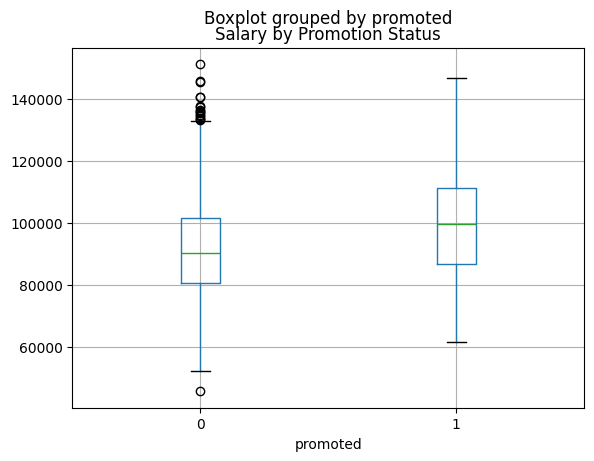

In [19]:
# Salary by promotion status
plt.figure(figsize=(10, 6))
df.boxplot(column='salary', by='promoted')
plt.title('Salary by Promotion Status')
plt.show()

In [20]:
X= df.drop(columns=['promoted'],axis=1)

In [21]:
y=df['promoted']

In [22]:
from sklearn.preprocessing import LabelEncoder

le_dept= LabelEncoder()
le_edu= LabelEncoder()

X['department_enc']= le_dept.fit_transform(X['department'])
X['education_level_enc']= le_edu.fit_transform(X['education_level'])

X=X.drop(columns=['department', 'education_level'], axis=1)

print(X.shape)
print(y.value_counts())


(1000, 13)
promoted
0    833
1    167
Name: count, dtype: int64


In [23]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [24]:
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5) 
dt_model.fit(X_train, y_train)


y_pred_dt = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {dt_accuracy:.3f}")

Decision Tree Accuracy: 0.810


In [25]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       167
           1       0.33      0.15      0.21        33

    accuracy                           0.81       200
   macro avg       0.59      0.55      0.55       200
weighted avg       0.76      0.81      0.78       200



In [26]:
from sklearn.metrics import confusion_matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("\nConfusion Matrix:")
print(cm_dt)


Confusion Matrix:
[[157  10]
 [ 28   5]]
